In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data

from env import host, username, password

url = f'mysql+pymysql://{username}:{password}@{host}/employees'

In [3]:
pd.read_sql('SELECT * FROM employees LIMIT 5 OFFSET 50', url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10051,1953-07-28,Hidefumi,Caine,M,1992-10-15
1,10052,1961-02-26,Heping,Nitsch,M,1988-05-21
2,10053,1954-09-13,Sanjiv,Zschoche,F,1986-02-04
3,10054,1957-04-04,Mayumi,Schueller,M,1995-03-13
4,10055,1956-06-06,Georgy,Dredge,M,1992-04-27


# Exercise 1
Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:
**On average, which manufacturer has the best miles per gallon?
How many different manufacturers are there?
How many different models are there?
Do automatic or manual cars have better miles per gallon?

In [4]:
mpg = data('mpg')
data('mpg', show_doc=True)

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [5]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [44]:
# On average, which manufacturer has the best miles per gallon?

mpg['avg_mpg'] = (mpg.cty + mpg.hwy) / 2

#best_mpg = mpg.iloc[mpg.avg_mpg.idxmax()]
#print(best_mpg.manufacturer)

print(mpg.groupby('manufacturer').avg_mpg.mean().idxmax())

honda


In [45]:
# How many different manufacturers are there?

#manu_count = mpg.manufacturer.value_counts().count()
#print(manu_count)

mpg.manufacturer.nunique()

15

In [46]:
# How many different models are there?

#model_count = mpg.model.value_counts().count()
#print(model_count)

mpg.model.nunique()

38

In [48]:
# Do automatic or manual cars have better miles per gallon?

automatics = mpg[mpg.trans.str.contains('auto')]

manuals = mpg[mpg.trans.str.contains('manual')]

#print(automatics.avg_mpg.mean())
#print(manuals.avg_mpg.mean())

print('Manual cars have better average gas mileage.')

#alternate way by Faith:
mpg['trans_category'] = np.where(mpg.trans.str.startswith('a'), 'auto', 'manual')

1        auto
2      manual
3      manual
4        auto
5        auto
        ...  
230      auto
231    manual
232      auto
233    manual
234      auto
Name: trans_category, Length: 234, dtype: object
Manual cars have better average gas mileage.


# Exercise 2 - Joining & Merging

**Copy the users and roles dataframes from the examples above. What do you think a right join would look like? An outer join? What happens if you drop the foreign keys from the dataframes and try to merge them?

In [28]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [29]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [50]:
# Right join

right_join = pd.merge(users, roles, left_on='role_id', right_on='id', how='right')
right_join

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1,admin
1,2.0,joe,2.0,2,author
2,3.0,sally,3.0,3,reviewer
3,4.0,adam,3.0,3,reviewer
4,NaN,NaN,NaN,4,commenter


In [51]:
# Outer join

outer_join = pd.merge(users, roles, left_on='role_id', right_on='id', how='outer')
outer_join

,id_x,name_x,role_id,id_y,name_y
0,1.0,bob,1.0,1.0,admin
1,2.0,joe,2.0,2.0,author
2,3.0,sally,3.0,3.0,reviewer
3,4.0,adam,3.0,3.0,reviewer
4,5.0,jane,NaN,NaN,NaN
5,6.0,mike,NaN,NaN,NaN
6,NaN,NaN,NaN,4.0,commenter


In [56]:
# What happens if you drop the foreign keys from the dataframes and try to merge them?

users_test = users.drop(columns='role_id')
roles_test = roles.drop(columns='id')

dropped_for_keys = pd.merge(users_test, roles_test)
dropped_for_keys

,id,name


In [40]:
print('It shows only the columns id and name, and does not include any rows.')

It shows only the columns id and name, and does not include any rows.


# Exercise 3 - Getting data from SQL databases

* a. Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.
* b. Use your function to obtain a connection to the employees database.
* c. Once you have successfully run a query:
  * Intentionally make a typo in the database url. What kind of error message do you see?
  * Intentionally make an error in your SQL query. What does the error message look like?
* d. Read the employees and titles tables into two separate dataframes
* e. Visualize the number of employees with each title.
* f. Join the employees and titles dataframes together.
* g. Visualize how frequently employees change titles.
* h. For each title, find the hire date of the employee that was hired most recently with that title.
* i. Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

In [77]:
#a

from env import host, password, username

In [78]:
def get_db_url(db, username=username, host=host, password=password):
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'

In [79]:
#employees = pd.read_sql(sql_query, get_db_url('employees'))

In [80]:
#employees.to_csv('employees.csv')

In [81]:
# b

sql_query = 'SELECT * FROM employees'

employees = pd.read_csv('employees.csv', index_col=0)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [85]:
# c

sql_query = 'SELECT * FROM titles'

titles = pd.read_sql(sql_query, get_db_url('titles'))
titles.head()

sql_query = 'SELECT # FORM titles'

titles = pd.read_sql(sql_query, get_db_url('employees'))
titles.head()

OperationalError: (pymysql.err.OperationalError) (1044, "Access denied for user 'darden_1035'@'%' to database 'titles'")
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [88]:
# d

#index_col=0

sql_query = 'SELECT * FROM titles'

#titles = pd.read_sql(sql_query, get_db_url('employees'))
#titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [89]:
# titles.to_csv('titles.csv')

In [90]:
titles = pd.read_csv('titles.csv', index_col=0)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [91]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     443308 non-null  int64 
 1   title      443308 non-null  object
 2   from_date  443308 non-null  object
 3   to_date    443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 16.9+ MB


In [92]:
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [93]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 16.0+ MB


In [94]:
# e
# Visualize the number of employees with each title.

titles.head(1)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01


In [95]:
titles.shape

(443308, 4)

In [96]:
current_bool = titles.to_date == titles.to_date.max()
current_bool.head()

0     True
1     True
2     True
3    False
4     True
Name: to_date, dtype: bool

In [97]:
current_employee_titles = titles[current_bool]
current_employee_titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01


In [98]:
current_employee_titles.shape

(240124, 4)

In [99]:
current_title_values = current_employee_titles.title.value_counts()
current_title_values

Senior Engineer       85939
Senior Staff          82024
Engineer              30983
Staff                 25526
Technique Leader      12055
Assistant Engineer     3588
Manager                   9
Name: title, dtype: int64

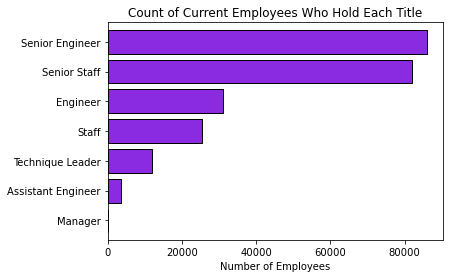

In [109]:
# This is the number of currennt employees who have titles.

current_title_values.plot.barh(color='blueviolet', 
                               ec='black', 
                               width=.8)

plt.title('Count of Current Employees Who Hold Each Title')
plt.xlabel('Number of Employees')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show()

In [110]:
# f
# Join the employees and titles dataframes together.

employees.shape

(300024, 6)

In [111]:
titles.shape

(443308, 4)

In [112]:
all_emp_titles = employees.merge(titles, on='emp_no')
all_emp_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01


In [113]:
all_emp_titles.shape

(443308, 9)

In [114]:
all_emp_titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      443308 non-null  int64 
 1   birth_date  443308 non-null  object
 2   first_name  443308 non-null  object
 3   last_name   443308 non-null  object
 4   gender      443308 non-null  object
 5   hire_date   443308 non-null  object
 6   title       443308 non-null  object
 7   from_date   443308 non-null  object
 8   to_date     443308 non-null  object
dtypes: int64(1), object(8)
memory usage: 33.8+ MB


In [115]:
all_emp_titles.to_date.max()

'9999-01-01'

In [116]:
# g
# Visualize how frequently employees change titles.

all_emp_titles.emp_no.value_counts().sample(5)

87778     1
428367    2
296652    2
44108     1
484954    2
Name: emp_no, dtype: int64

In [117]:
changes = all_emp_titles.emp_no.value_counts()
changes.value_counts()

1    159754
2    137256
3      3014
Name: emp_no, dtype: int64

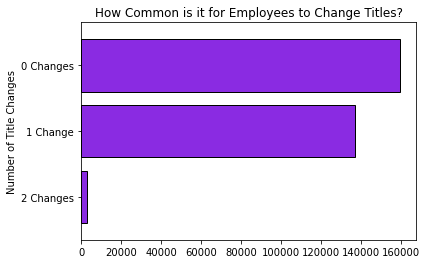

In [118]:
changes.value_counts().plot(kind='barh', 
                            color='blueviolet', 
                            ec='black', 
                            width=.8)

plt.title('How Common is it for Employees to Change Titles?')
plt.ylabel('Number of Title Changes')
plt.yticks(ticks=[0,1,2], labels=['0 Changes', '1 Change', '2 Changes'])

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show()

In [120]:
# h
# For each title, find the hire date of the employee that was hired most recently with that title.

all_emp_titles.groupby('title').hire_date.max()

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [121]:
# i
# Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

dept_title_query = '''

                    SELECT t.emp_no, 
                    t.title, 
                    t.from_date, 
                    t.to_date, 
                    d.dept_name 
                    FROM departments AS d 
                    JOIN dept_emp AS de USING(dept_no) 
                    JOIN titles AS t USING(emp_no);

                    '''

In [122]:
# dept_titles = pd.read_sql(dept_title_query, get_db_url('employees'))

In [123]:
# dept_titles.to_csv('dept_titles.csv')

In [124]:
dept_titles = pd.read_csv('dept_titles.csv', index_col=0)
dept_titles.head()

,emp_no,title,from_date,to_date,dept_name
0,10011,Staff,1990-01-22,1996-11-09,Customer Service
1,10038,Senior Staff,1996-09-20,9999-01-01,Customer Service
2,10038,Staff,1989-09-20,1996-09-20,Customer Service
3,10049,Senior Staff,2000-05-04,9999-01-01,Customer Service
4,10049,Staff,1992-05-04,2000-05-04,Customer Service


In [125]:
dept_titles.shape

(489903, 5)

In [126]:
all_titles_crosstab = pd.crosstab(dept_titles.dept_name, dept_titles.title)
all_titles_crosstab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


In [127]:
all_titles_crosstab.style.background_gradient(cmap='PuBuGn', axis=1)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


In [128]:
# Create a subset of only titles currently held by employees

current_titles = dept_titles[dept_titles.to_date == dept_titles.to_date.max()]
current_titles.head()

,emp_no,title,from_date,to_date,dept_name
1,10038,Senior Staff,1996-09-20,9999-01-01,Customer Service
3,10049,Senior Staff,2000-05-04,9999-01-01,Customer Service
5,10060,Senior Staff,1996-05-28,9999-01-01,Customer Service
7,10088,Senior Staff,1993-09-02,9999-01-01,Customer Service
11,10112,Staff,1998-05-01,9999-01-01,Customer Service


In [129]:
current_titles.shape

(265332, 5)

In [130]:
# Create a frequency table of titles by department

current_titles_crosstab = pd.crosstab(current_titles.dept_name, current_titles.title)
current_titles_crosstab

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,12349,3902,241
Development,1833,15677,1,43364,1085,315,6117
Finance,0,0,1,0,10650,3199,0
Human Resources,0,0,1,0,10843,3416,0
Marketing,0,0,1,0,12371,3880,0
Production,1542,13325,1,37156,1123,349,5210
Quality Management,433,3744,1,10390,0,0,1422
Research,77,830,1,2250,10219,3206,321
Sales,0,0,1,0,32032,9967,0


In [131]:
current_titles_crosstab.style.background_gradient(cmap='PuBuGn', axis=1)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,12349,3902,241
Development,1833,15677,1,43364,1085,315,6117
Finance,0,0,1,0,10650,3199,0
Human Resources,0,0,1,0,10843,3416,0
Marketing,0,0,1,0,12371,3880,0
Production,1542,13325,1,37156,1123,349,5210
Quality Management,433,3744,1,10390,0,0,1422
Research,77,830,1,2250,10219,3206,321
Sales,0,0,1,0,32032,9967,0


In [132]:
current_titles_crosstab.style.highlight_max(axis=1)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,68,627,1,1790,12349,3902,241
Development,1833,15677,1,43364,1085,315,6117
Finance,0,0,1,0,10650,3199,0
Human Resources,0,0,1,0,10843,3416,0
Marketing,0,0,1,0,12371,3880,0
Production,1542,13325,1,37156,1123,349,5210
Quality Management,433,3744,1,10390,0,0,1422
Research,77,830,1,2250,10219,3206,321
Sales,0,0,1,0,32032,9967,0


# Exercise 4

**Use your get_db_url function to help you explore the data from the chipotle database. Use the data to answer the following questions:

* What is the total price for each order?
* What are the most popular 3 items?
* Which item has produced the most revenue?

In [134]:
chipotle_sql_query = '''
                     SELECT *
                     FROM orders;
                     '''

In [135]:
orders = pd.read_sql(chipotle_sql_query, get_db_url('chipotle'))
orders.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [136]:
orders.shape

(4622, 6)

In [137]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  4622 non-null   int64 
 1   order_id            4622 non-null   int64 
 2   quantity            4622 non-null   int64 
 3   item_name           4622 non-null   object
 4   choice_description  4622 non-null   object
 5   item_price          4622 non-null   object
dtypes: int64(3), object(3)
memory usage: 216.8+ KB


In [138]:
# a
# What is the total price for each order?

orders['item_price'] = orders.item_price.str.replace('$', '').astype(float)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  4622 non-null   int64  
 1   order_id            4622 non-null   int64  
 2   quantity            4622 non-null   int64  
 3   item_name           4622 non-null   object 
 4   choice_description  4622 non-null   object 
 5   item_price          4622 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 216.8+ KB


In [139]:
order_totals = orders.groupby('order_id').item_price.sum()
order_totals.sample(10)

order_id
1512    23.00
187     10.68
10      13.20
1449    95.39
754     22.69
1580    21.47
768     18.50
366     26.75
564     13.00
185     17.50
Name: item_price, dtype: float64

In [141]:
# b
# What are the most popular 3 items?

top_six = orders.groupby('item_name').quantity.sum().sort_values(ascending=False).head(3)
top_six

item_name
Chicken Bowl           761
Chicken Burrito        591
Chips and Guacamole    506
Name: quantity, dtype: int64

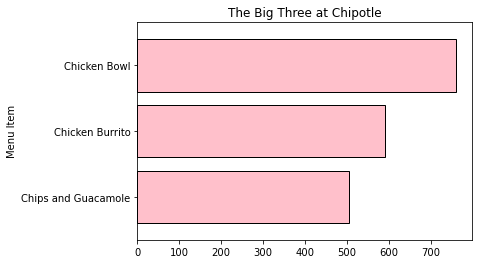

In [142]:
top_six.plot(kind='barh',
             color='pink', 
             ec='black', 
             width=.8)

plt.title('The Big Three at Chipotle')
plt.ylabel('Menu Item')

# reorder y-axis of horizontal bar chart
plt.gca().invert_yaxis()

plt.show()

In [143]:
# c
# Which item has produced the most revenue?

orders.sample(5)

,id,order_id,quantity,item_name,choice_description,item_price
1502,1503,610,1,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream, Lettuce]]",8.75
4164,4165,1663,1,Chicken Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice, Black Beans, Cheese, Sour Cream, Guacam...",11.25
583,584,239,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Rice, Black Beans, Cheese, Sour Cream, Guacamole, Lettuce]]",11.25
3639,3640,1455,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Cheese, Guacamole, Lettuce]]",11.25
3971,3972,1592,1,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Lettuce]]",9.25


In [144]:
orders.groupby('item_name').item_price.sum().sort_values(ascending=False)

item_name
Chicken Bowl                             7342.73
Chicken Burrito                          5575.82
Steak Burrito                            3851.43
Steak Bowl                               2260.19
Chips and Guacamole                      2201.04
Chicken Salad Bowl                       1228.75
Chicken Soft Tacos                       1108.09
Veggie Burrito                            934.77
Barbacoa Burrito                          894.75
Veggie Bowl                               867.99
Carnitas Bowl                             736.71
Barbacoa Bowl                             672.36
Carnitas Burrito                          597.83
Steak Soft Tacos                          536.05
Chips                                     494.34
Chicken Crispy Tacos                      472.13
Canned Soft Drink                         438.75
Carnitas Soft Tacos                       375.94
Chips and Fresh Tomato Salsa              361.36
Steak Crispy Tacos                        357.34
6 Pack Sof

In [145]:
orders.groupby('item_name').item_price.sum().sort_values(ascending=False).head(1)

item_name
Chicken Bowl    7342.73
Name: item_price, dtype: float64

In [146]:
orders.groupby('item_name').item_price.sum().idxmax()

'Chicken Bowl'